# ACTIVE CONTOURS

##### MEDICAL IMAGE ANALYSIS
##### Degree in Biomedical Engineering
##### Course 2020/2021


<div class="alert alert-block alert-success">
<b>Authors:</b> $$Raúl \quad López \quad González$$ <br>
$$Hugo \quad Calero \quad Diaz$$ <br>
$$Pablo \quad Laso \quad Mielgo$$

</div>

In [1]:
# Modules that we use in this practice

from skimage import io
import numpy as np
%pylab inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
from pydicom import dcmread
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.segmentation import active_contour

from Exercise2 import submatrix, RegionGrowingP2, WatershedP2

Populating the interactive namespace from numpy and matplotlib


# Active contours explanation

The active contour algorithm  tries to fit snakes to regions of an image in order to segment it. It does so by minimising the energy which is defined both by the image and  by the spline’s shape.

The energy mentioned above is a measure of the rate of change in the birgthness of pixels in the regions of the image

In the other hand, snakes are basically splines ( differential functions ) that minimize energy and are subject to different forces that make spline vary its shape and position to adjust to the border of the regions that we want to segment, by moving dynamically to the local minimun.

This model is a semi-automatic process due to the prior knowledge required to localize the region of interest.

In the respective code, we identify three parameters related to three different energies that are going to be minimized
* Alpha = Continuity
* Betha = Curvature
* Gamma = Gradient

The first two corresponds to the internal energy of the region, which will be minimized when the pixels gets closer to each 
other. If the contrary happens, the energy will increase, so the snake will not follow that path. 

<ipython-input-2-bd44ad98e813>:11: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = active_contour(gaussian(img),


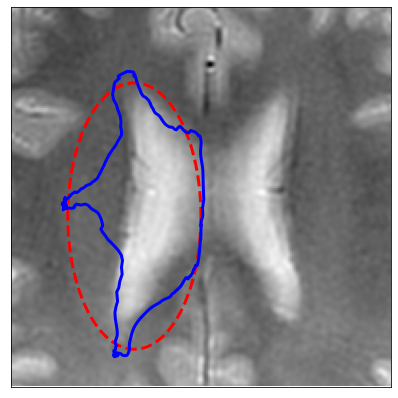

In [2]:
image_in = "IM-0003-0023.dcm"
ds = dcmread(image_in)
img_in = ds.pixel_array
img = img_in[150:350,150:350]

s = np.linspace(0, 2*np.pi, 400)
r = 110 + 70*np.sin(s)
c = 65 + 35*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img),
                       init, alpha=0.025, beta=40, gamma=0.001, w_line=5, w_edge=200)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

## REGION GROWING

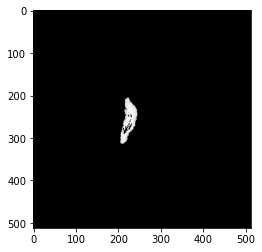

In [3]:
image_in = "IM-0003-0023.dcm"

left_ventricle, mask = RegionGrowingP2("dicom", image_in, 0.043, -0.043, [(220, 220)])
plt.imshow(left_ventricle, cmap = "gray")

## WATERSHED

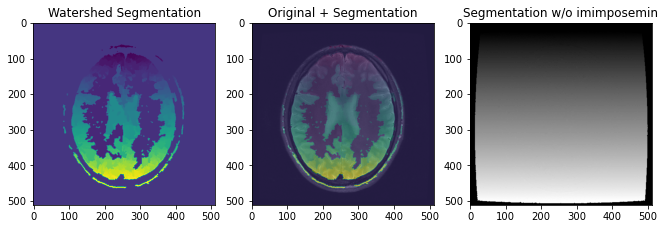

In [25]:
a, b, c = WatershedP2("IM-0003-0023.dcm", [(220,210), (221,209)], "dicom")

# EXAMPLE 2 

We are going to try to segment an anatomical structure of the following image that we thought could be better for segmentation as it appears darker and with more homogeneous values overall. This is not the prostate. 

## ACTIVE CONTOURS

<ipython-input-44-1be5008d6040>:15: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = active_contour(gaussian(img),


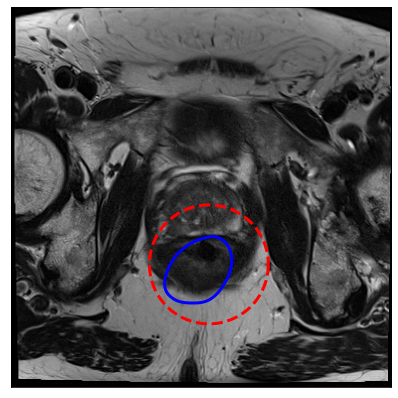

In [44]:
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.segmentation import active_contour

image_in = "1-10.dcm"
ds = dcmread(image_in)
img_in = ds.pixel_array
img = img_in 

s = np.linspace(0, 2*np.pi, 400)
r = 260 + 60*np.sin(s)
c = 200 + 60*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

## WATERSHED

In [ ]:
(199.76490066225162, 246.17549668874173), (187.04966887417217, 267.7913907284768)

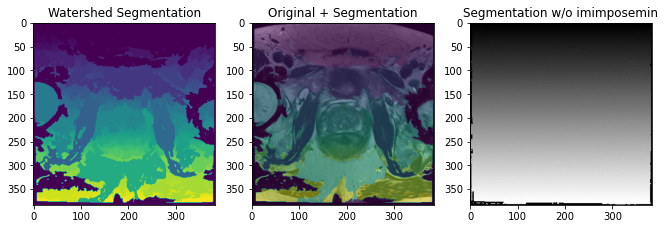

In [39]:
a, b, c = WatershedP2("1-10.dcm", [(260,200), (247, 200), (268,187)], "dicom")

## REGION GROWING

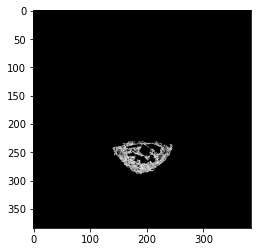

In [38]:
left_ventricle, mask = RegionGrowingP2("dicom", "1-10.dcm", 0.035, -0.035, [(260, 200)])
plt.imshow(left_ventricle, cmap = "gray")

In neither of the 2 previous examples where to try to apply active contours to our images we obtain great results. This happens because the difference between the levels of gray values within the proper structures is significant.

We have tried to implement an histogram correction and power transformation to the original images, but neither method offered better results. We also modified the parameters w_edge (attraction to the edges) and w_line (attraction to the brightness) from the function of python. However the results were still not satisfactory.

Even though watershed and region growing by themselves still do not offer great results, we can clearly see how the Region Growing algorithm performs the best of the 3 in both scenarios.

However, we cannot confirm that Region Growing is the best algorithm as a whole, as they all depend greatly on the input image.

---
HRL